In [37]:
## San Francisco Rental Prices Dashboard

In [38]:
 # imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [39]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [40]:
## Import Data

In [41]:
file_path = Path("../Resources/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("../Resources/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [42]:
## Panel Visualizations

In [57]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    housing_units_by_year = (sfo_data.groupby('year')['housing_units'].mean())

    return housing_units_by_year.hvplot.bar(x='year', y='housing_units', ylim=(372000, 385000)).opts(title="Housing Units in San Francisco from 2010 to 2016", yformatter="%.0f", width=600)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    avg_gross_rent = (sfo_data.groupby('year')['gross_rent'].mean())

    return avg_gross_rent.plot(label='Average Gross Rent San Francisco')


def average_sales_price():
    """Average Sales Price Per Year."""
    
    avg_price_sqr_ft = (sfo_data.groupby('year')['sale_price_sqr_foot'].mean())

    return avg_price_sqr_ft.plot()


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    neighborhood_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()

    return neighborhood_df.hvplot(label='Average Price per Square Feet by Year',            x='year', y='sale_price_sqr_foot', groupby='neighborhood')



<AxesSubplot:xlabel='year'>

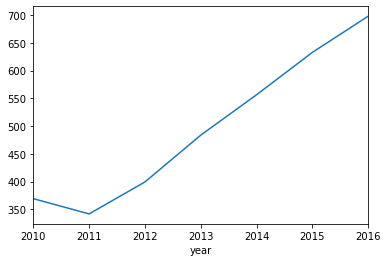

In [59]:
average_sales_price()